In [3]:
import pandas as pd
import numpy as np
import math

In [4]:
#path's csv file, 
nov = pd.read_csv('/Users/tommy/Desktop/codici/datasets/2019-Nov.csv', header='infer',
parse_dates=['event_time'],
date_parser=pd.to_datetime)

In [5]:
octo = pd.read_csv('/Users/tommy/Desktop/codici/datasets/2019-Oct.csv', header='infer',
parse_dates=['event_time'],
date_parser=pd.to_datetime)

In [6]:
tot = pd.concat([nov,octo], axis = 0)

In [7]:
tot.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [8]:
#PURCHASE RATE: => #NUMBER OF PRODUCT SOLD/#USERS
subRQ6 = tot[['event_type','user_id','category_code','product_id']]

In [9]:
subRQ6 = subRQ6.dropna()
subRQ6['category_code'] = [el.split('.')[0] for el in list(subRQ6['category_code']) if type(el) == str]

In [10]:
subRQ6.head()

,event_type,user_id,category_code,product_id
0,view,520088904,electronics,1003461
1,view,530496790,appliances,5000088
3,view,518085591,appliances,3601530
4,view,558856683,electronics,1004775
5,view,520772685,computers,1306894


In [11]:
# obtaining the number of product sold:
# by taking only rows about purchasing
# and at the end we count them (.shape[0])
# shape[0] are the rows of the dataset where the event is equal to purchase
# so it rapresents the product sold

df_prod_sold =  subRQ6[subRQ6['event_type']=='purchase']
prod_sold = df_prod_sold.shape[0]

In [12]:
prod_sold

1252145

In [13]:
# in a similar way we calculate the number of user:
# this time we group by 'user_id' so we obtain the exact users's number
# we extract that number by the command shape[0] (number of rows)
users = subRQ6.groupby('user_id').product_id.count().shape[0]

In [14]:
users

4300482

In [15]:
#finally we calculate the actual purchase rate value
purchase_rate = prod_sold/users
round(purchase_rate,4)

0.2912

In [16]:
#Now that we have the purchase rate we can calculate the conversion rate
# CONVERSION RATE = PURCHASE RATE/ #VIEWS

In [17]:
#same think of before
df_views = subRQ6[subRQ6['event_type']=='view']
views = df_views.shape[0]

In [18]:
#conversion rate calculated by following the previous formula
conversion_rate = purchase_rate / views
conversion_rate

4.1439977382377554e-09

In [22]:
#purchase rate of each category

In [24]:
number_of_sales = df_prod_sold.groupby('category_code').product_id.count()
number_of_sales

category_code
accessories       3741
apparel          22217
appliances      174022
auto             21339
computers        62332
construction     16500
country_yard       132
electronics     916667
furniture        19843
kids             11648
medicine           654
sport             2725
stationery         325
Name: product_id, dtype: int64

In [ ]:
# obtaining number of users for each categories
# first step: grouping for categories subRQ6
grouped_subRQ6 = subRQ6.groupby("category_code")

In [28]:
#now we want to extract the number of unique users for each category
user_of_each_cat = grouped_subRQ6.agg({"user_id": "nunique"})

In [26]:
grouped_subRQ6.head()

,event_type,user_id,category_code,product_id
0,view,520088904,electronics,1003461
1,view,530496790,appliances,5000088
3,view,518085591,appliances,3601530
4,view,558856683,electronics,1004775
5,view,520772685,computers,1306894
...,...,...,...,...
37244,view,562877884,stationery,53400066
37509,view,562877884,stationery,53400067
37868,view,562877884,stationery,53400067
37948,view,562877884,stationery,53400066


In [29]:
user_of_each_cat.iloc[:,0]

category_code
accessories      115558
apparel          625291
appliances      1087898
auto             287480
computers        547379
construction     219154
country_yard       8221
electronics     3108287
furniture        432412
kids             226201
medicine           7566
sport             82279
stationery         5690
Name: user_id, dtype: int64

In [30]:
#converting into a series
series_of_unique_users = user_of_each_cat.iloc[:,0]

In [31]:
#calculating the purchase rate => 
# number of product sold for each catogory / number of unique user for each category
purchase_rate_for_cat = number_of_sales.divide(series_of_unique_users)
round(purchase_rate_for_cat,4).sort_values(ascending=False)

category_code
electronics     0.2949
appliances      0.1600
computers       0.1139
medicine        0.0864
construction    0.0753
auto            0.0742
stationery      0.0571
kids            0.0515
furniture       0.0459
apparel         0.0355
sport           0.0331
accessories     0.0324
country_yard    0.0161
dtype: float64

In [ ]:
# now for the last step of this request 
# we calculate the conversion rate of each categories
# we have yet the purchase rate of product for each category
# in a similar way we are going to calculate the number of views
# for each category and then we simply divide them.


In [32]:
number_of_views = df_views.groupby('category_code').product_id.count()
number_of_views

category_code
accessories       616475
apparel          4477518
appliances      12837916
auto             2157706
computers        6297977
construction     1759762
country_yard       31255
electronics     37026582
furniture        3295250
kids             1292002
medicine           34738
sport             415087
stationery         19323
Name: product_id, dtype: int64

In [33]:
coversion_rate_for_categories = purchase_rate_for_cat.divide(number_of_views)
coversion_rate_for_categories.sort_values(ascending=False)

category_code
stationery      2.955946e-06
medicine        2.488322e-06
country_yard    5.137239e-07
sport           7.978815e-08
accessories     5.251365e-08
construction    4.278392e-08
kids            3.985599e-08
auto            3.440124e-08
computers       1.808098e-08
furniture       1.392583e-08
appliances      1.246010e-08
electronics     7.964836e-09
apparel         7.935347e-09
dtype: float64

In [34]:
#now we apply a traslation to plot better the results
coversion_for_plot = ((coversion_rate_for_categories)*10**8).sort_values(ascending=False)

In [38]:
coversion_for_plot.head(10)

category_code
stationery      295.594630
medicine        248.832212
country_yard     51.372391
sport             7.978815
accessories       5.251365
construction      4.278392
kids              3.985599
auto              3.440124
computers         1.808098
furniture         1.392583
dtype: float64

In [54]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 10))

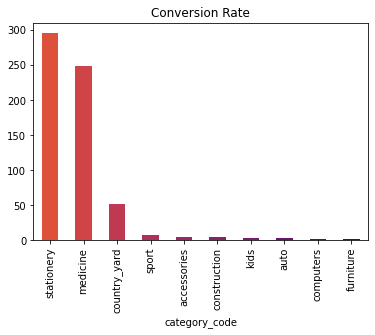

In [55]:
#Series.plot(*args, **kwargs)
coversion_for_plot.head(10).plot(kind = 'bar', title = 'Conversion Rate',
                        color = color)